<a href="https://colab.research.google.com/github/sayuts/teco/blob/main/whycapital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

In [ ]:
data = {t: yf.download(t, period='5y')['Close'] for t in tickers}

/tmp/ipython-input-1691399085.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = {t: yf.download(t, period='5y')['Close'] for t in tickers}
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1691399085.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = {t: yf.download(t, period='5y')['Close'] for t in tickers}
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1691399085.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = {t: yf.download(t, period='5y')['Close'] for t in tickers}
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1691399085.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = {t: yf.download(t, period='5y')['Close'] for t in tickers}
[*********************100%***********************]  1 of 1 comple

[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1081929720.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_price = float(model.predict([[future_day]])[0])


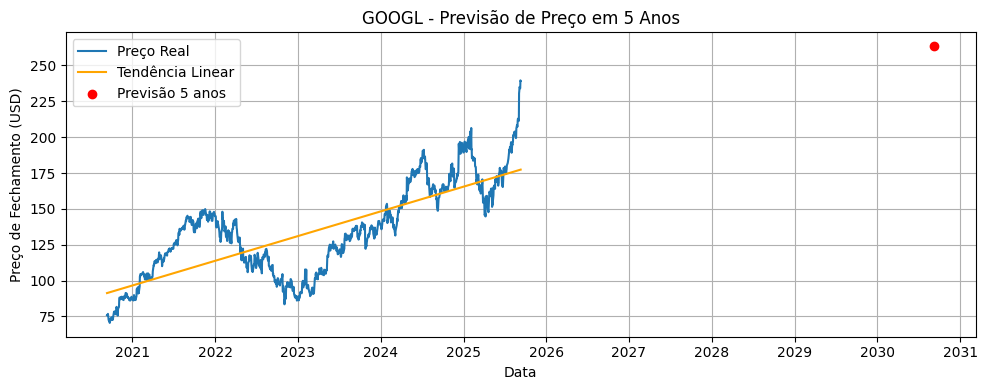

[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1081929720.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_price = float(model.predict([[future_day]])[0])


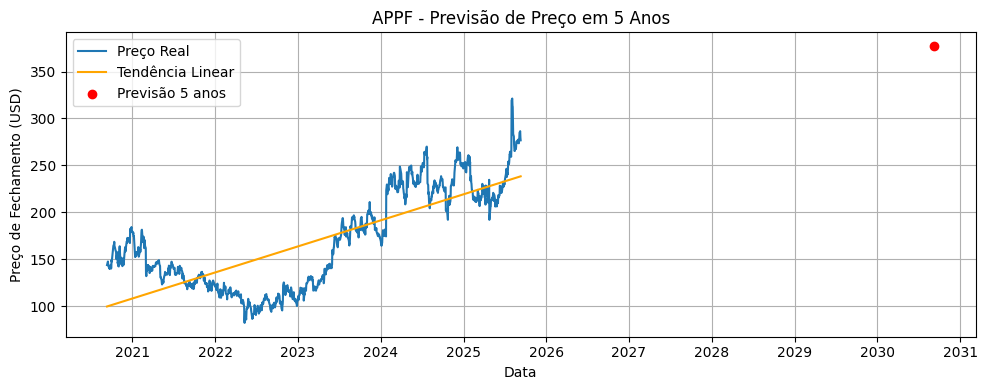

[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1081929720.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_price = float(model.predict([[future_day]])[0])


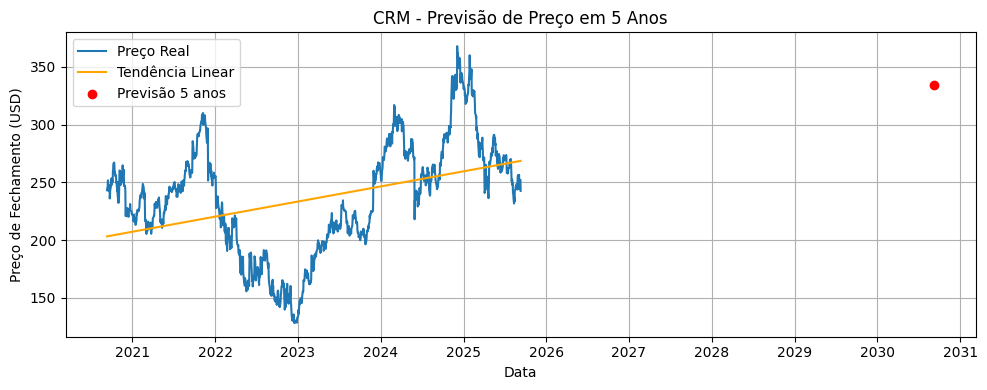

[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1081929720.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_price = float(model.predict([[future_day]])[0])


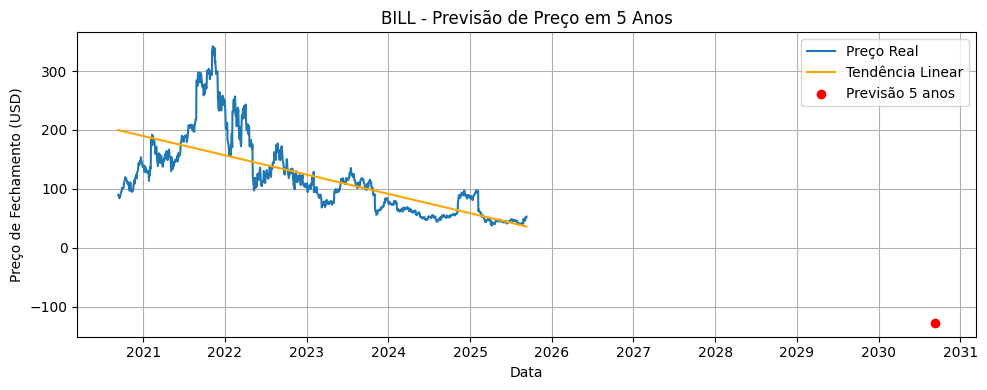

Previsões de preço em 5 anos:
GOOGL: $263.46
APPF: $376.99
CRM: $333.87
BILL: $-127.45


In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

tickers = ['GOOGL', 'APPF', 'CRM', 'BILL']
predictions = {}

for ticker in tickers:

    try:
        df = yf.download(ticker, period='5y', interval='1d', auto_adjust=False)

        if 'Close' not in df.columns or df.empty:
            continue

        df = df.reset_index()
        df['Day'] = (df['Date'] - df['Date'].min()).dt.days

        X = df[['Day']]
        y = df['Close']

        model = LinearRegression()
        model.fit(X, y)

        future_day = df['Day'].max() + 1825
        predicted_price = float(model.predict([[future_day]])[0])

        predictions[ticker] = predicted_price



        plt.figure(figsize=(10, 4))
        plt.plot(df['Date'], y, label='Preço Real')
        plt.plot(df['Date'], model.predict(X), label='Tendência Linear', color='orange')


        future_date = df['Date'].max() + pd.Timedelta(days=1825)
        plt.scatter(future_date, predicted_price, color='red', label='Previsão 5 anos', zorder=5)

        plt.title(f'{ticker} - Previsão de Preço em 5 Anos')
        plt.xlabel('Data')
        plt.ylabel('Preço de Fechamento (USD)')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Erro com {ticker}: {e}")

print("Previsões de preço em 5 anos:")
for t, price in predictions.items():
    print(f"{t}: ${float(price):.2f}")


In [ ]:
!pip install pygooglenews textblob
!python -m textblob.download_corpora

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 6.4 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6046 sha256=a178b4ef8fb81b3cd638a2082f4bb1743c849d0b1efdb6e2168ccc2f695eb8b5
  Stored in directory: /root/.cache/pip/wheels/03/f5/1a/23761066dac1d0e8e683e5fdb27e12de53209d05a4a37e6246
Successfully built sgmllib3k
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data..

In [ ]:
from pygooglenews import GoogleNews
from textblob import TextBlob

gn = GoogleNews(lang='en', country='US')
empresas = {
    "NVDA": "NVIDIA Corporation",
    "IREN": "IREN Limited",
    "BE": "Bloom Energy Corporation",
    "ORCL": "Oracle Corporation",
    "MSFT": "Microsoft Corporation",
}

resultados = {}

for ticker, nome in empresas.items():
    search = gn.search(nome, when='7d')
    entries = search['entries'][:10]

    polaridades = []
    for entry in entries:
        titulo = entry.title
        sentimento = TextBlob(titulo).sentiment.polarity
        polaridades.append(sentimento)

    if polaridades:
        media = sum(polaridades) / len(polaridades)
        if media > 0.1:
            classificacao = "bom"
        elif media < -0.1:
            classificacao = "ruim"
        else:
            classificacao = "médio"
    else:
        classificacao = "sem dados"

    resultados[ticker] = {
        "empresa": nome,
        "classificacao": classificacao,
        "polaridade_media": round(media, 3) if polaridades else None,
        "titulos": [entry.title for entry in entries]
    }

# Exibe o resumo
for ticker, info in resultados.items():
    print(f"\n{info['empresa']} ({ticker})")
    print(f"Classificação de sentimento: {info['classificacao']} (polaridade média: {info['polaridade_media']})")
    print("Principais manchetes:")
    for titulo in info['titulos']:
        print(f" - {titulo}")



Google (GOOGL)
Classificação de sentimento: bom (polaridade média: 0.111)
Principais manchetes:
 - AI Mode is now available in five new languages around the world. - The Keyword
 - Veo 3 and Veo 3 Fast – new pricing, new configurations and better resolution - Google for Developers Blog
 - Google must pay $425 million in privacy lawsuit, jury says - Axios
 - PubMatic Is Suing Google For Monopolistic Behavior, The Second Such SSP Case - AdExchanger
 - Google told to pay $425m for breaching millions of users’ privacy - Al Jazeera
 - Jury slams Google over app data collection to tune of $425 million - Courthouse News
 - Google hit with $3.5 billion fine from European Union in ad-tech antitrust case - ABC News
 - Google Is Fined $3.5 Billion for Breaking Europe’s Antitrust Laws - The New York Times
 - Google Cloud anticipates at least $58 billion revenue boost over next two years - Reuters
 - Google can thank OpenAI for its big win in court. - Yahoo Finance

AppFolio (APPF)
Classificação d